# GJ1132

In [1]:
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'LHS-281'
obs = om.Observation.from_MAST(name)

INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap01ivq/idap01ivq_flt.fits with expected size 4348800. [astroquery.query]


INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap01iwq/idap01iwq_flt.fits with expected size 4351680. [astroquery.query]


INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap02xfq/idap02xfq_flt.fits with expected size 4351680. [astroquery.query]


INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap02xgq/idap02xgq_flt.fits with expected size 4351680. [astroquery.query]


INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap03a1q/idap03a1q_flt.fits with expected size 4328640. [astroquery.query]


INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap03a2q/idap03a2q_flt.fits with expected size 4328640. [astroquery.query]


INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap04t4q/idap04t4q_flt.fits with expected size 4328640. [astroquery.query]


INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap04t5q/idap04t5q_flt.fits with expected size 4328640. [astroquery.query]


INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap05puq/idap05puq_flt.fits with expected size 4328640. [astroquery.query]


INFO: Found cached file /Users/ch/.ombre-cache/mastDownload/HST/idap05pvq/idap05pvq_flt.fits with expected size 4328640. [astroquery.query]


In [3]:
obs

LHS-281 [10 Visits]

In [4]:
obs.fit_transit()

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

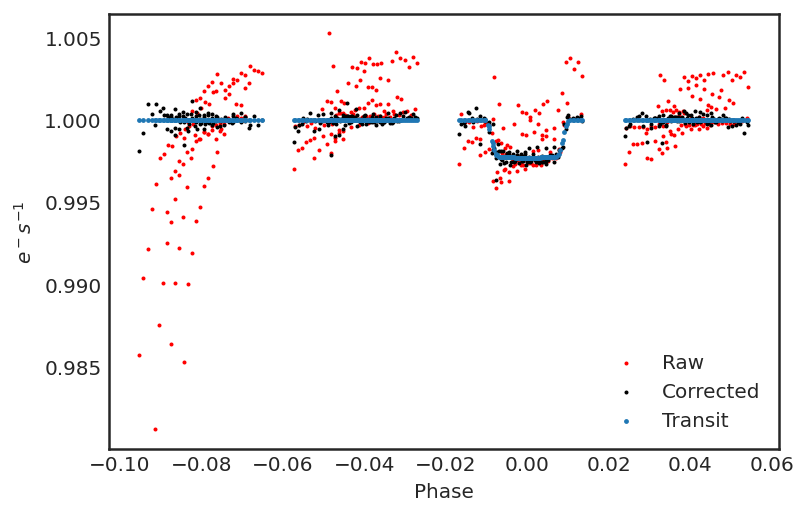

In [5]:
obs.plot()

In [6]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/10 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  10%|█         | 1/10 [00:16<02:29, 16.66s/it]

Fitting Transit/Eclipse Model:  20%|██        | 2/10 [00:32<02:10, 16.31s/it]

Fitting Transit/Eclipse Model:  30%|███       | 3/10 [00:49<01:54, 16.33s/it]

Fitting Transit/Eclipse Model:  40%|████      | 4/10 [01:05<01:38, 16.43s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 5/10 [01:21<01:21, 16.21s/it]

Fitting Transit/Eclipse Model:  60%|██████    | 6/10 [01:37<01:04, 16.08s/it]

Fitting Transit/Eclipse Model:  70%|███████   | 7/10 [01:53<00:48, 16.10s/it]

Fitting Transit/Eclipse Model:  80%|████████  | 8/10 [02:09<00:31, 15.95s/it]

Fitting Transit/Eclipse Model:  90%|█████████ | 9/10 [02:25<00:16, 16.20s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 10/10 [02:41<00:00, 16.18s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 10/10 [02:41<00:00, 16.20s/it]

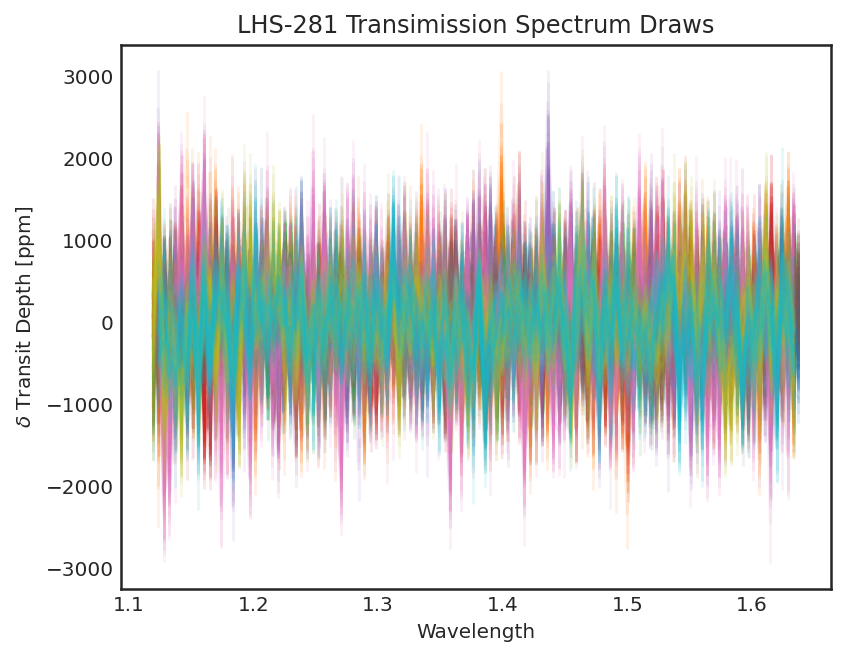

In [7]:
obs.plot_spectra()

<AxesSubplot:title={'center':'LHS-281 Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

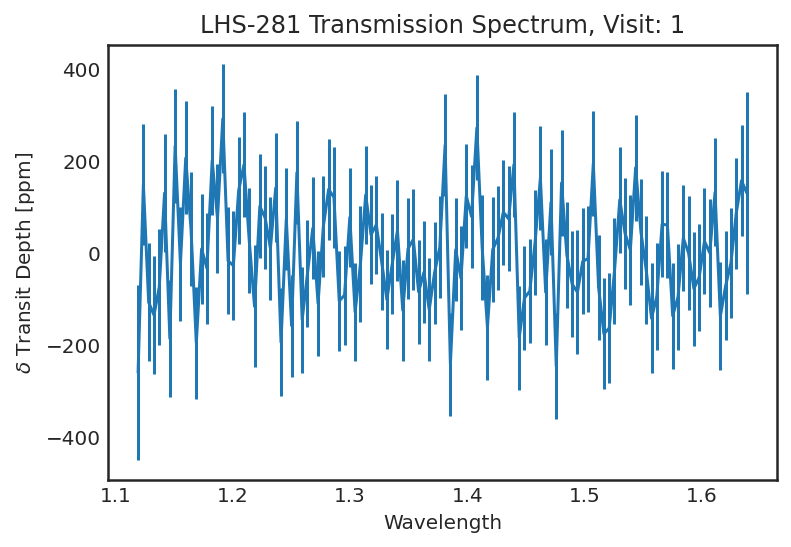

In [8]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

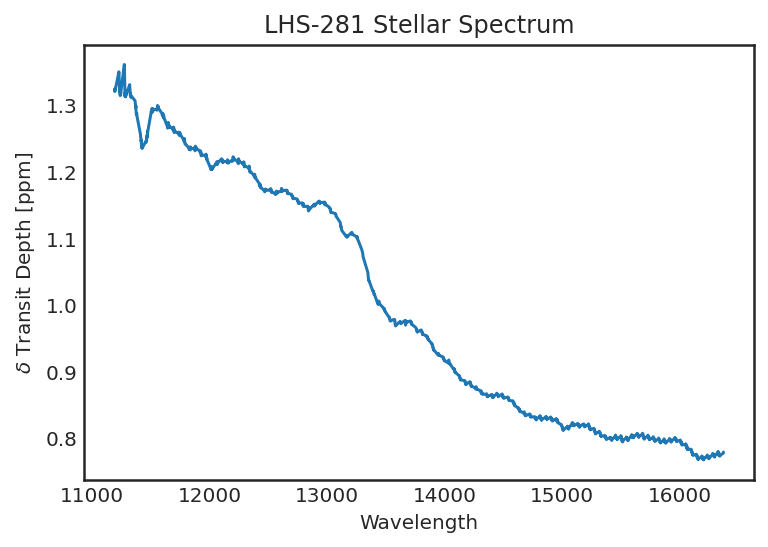

In [9]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [10]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

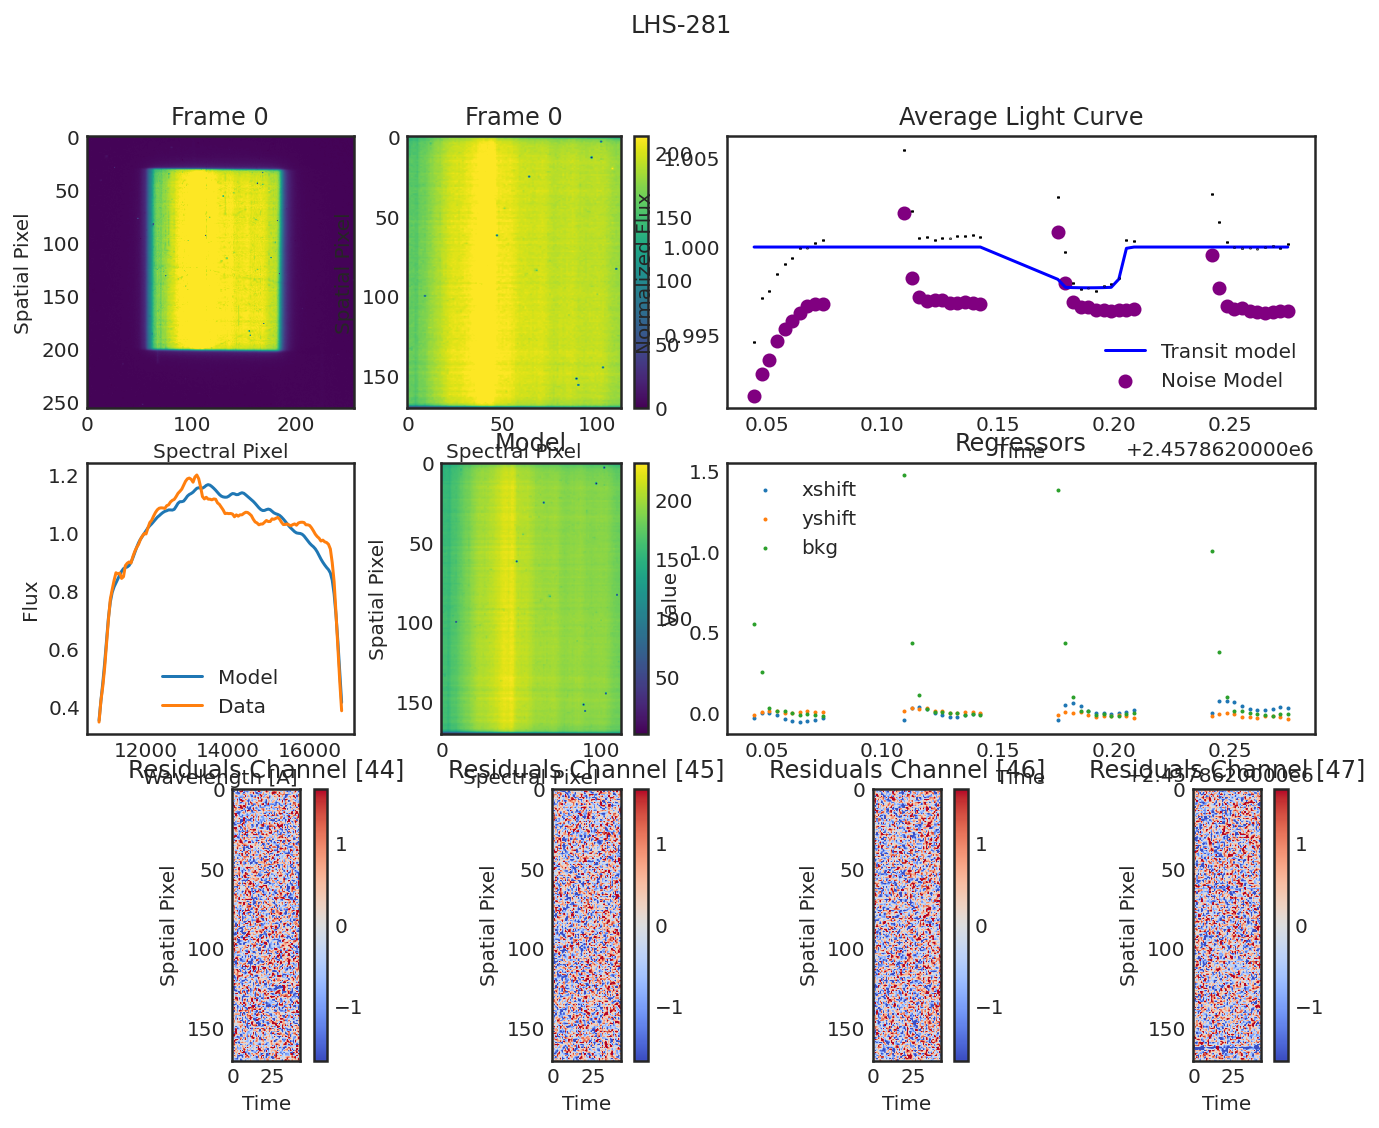

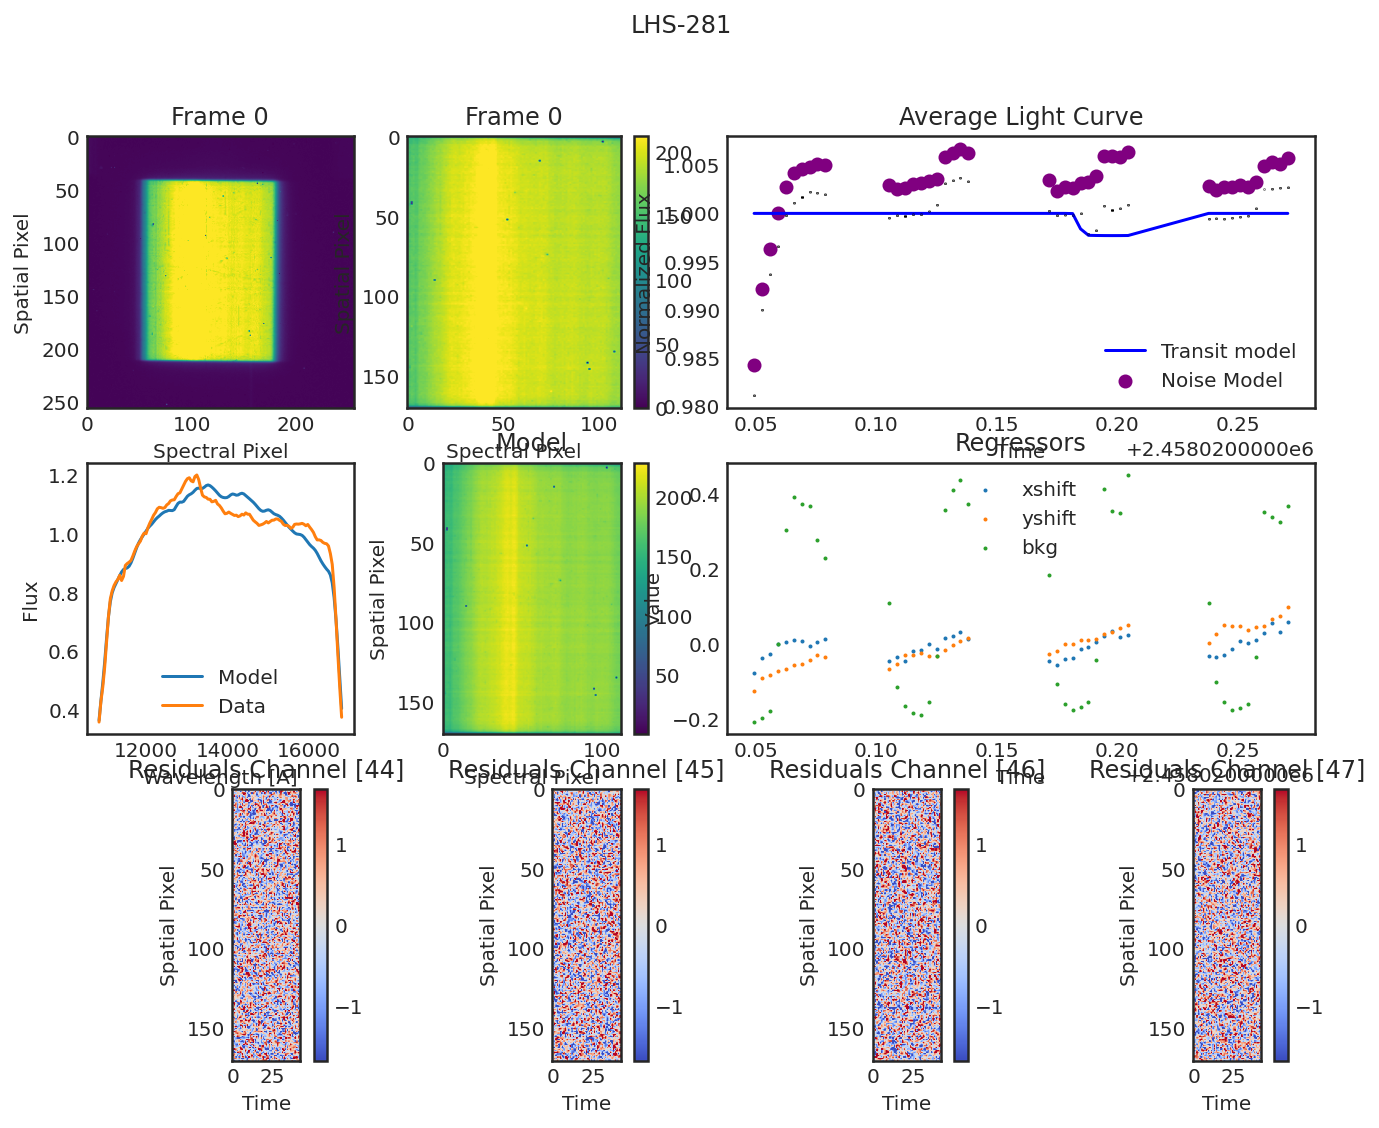

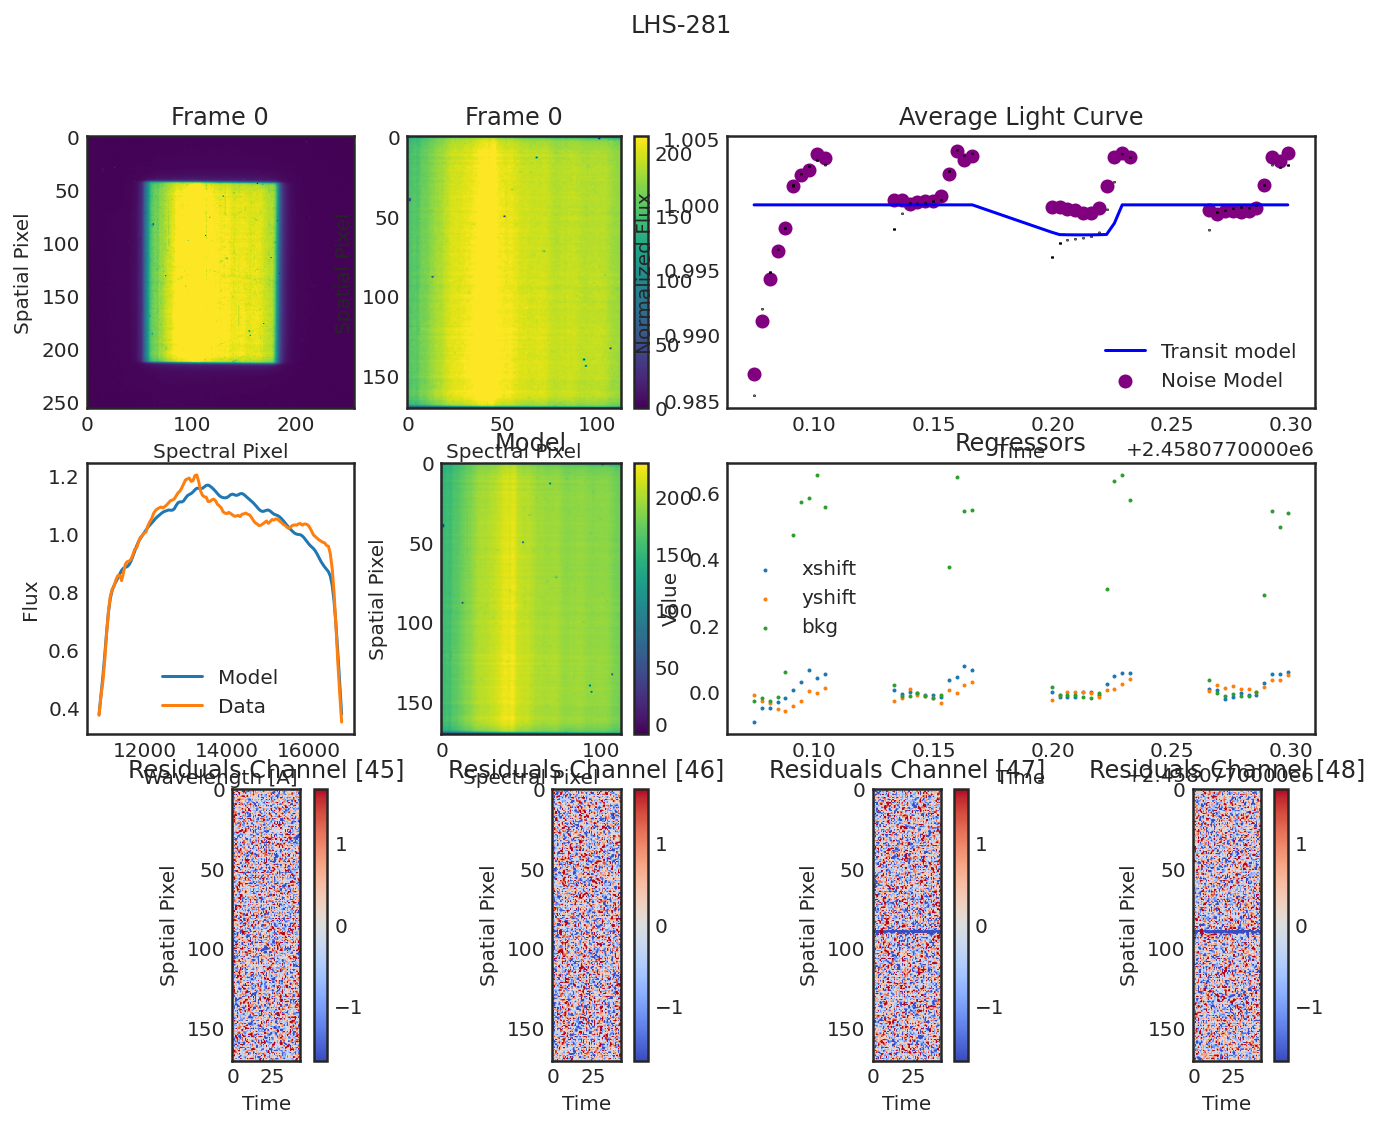

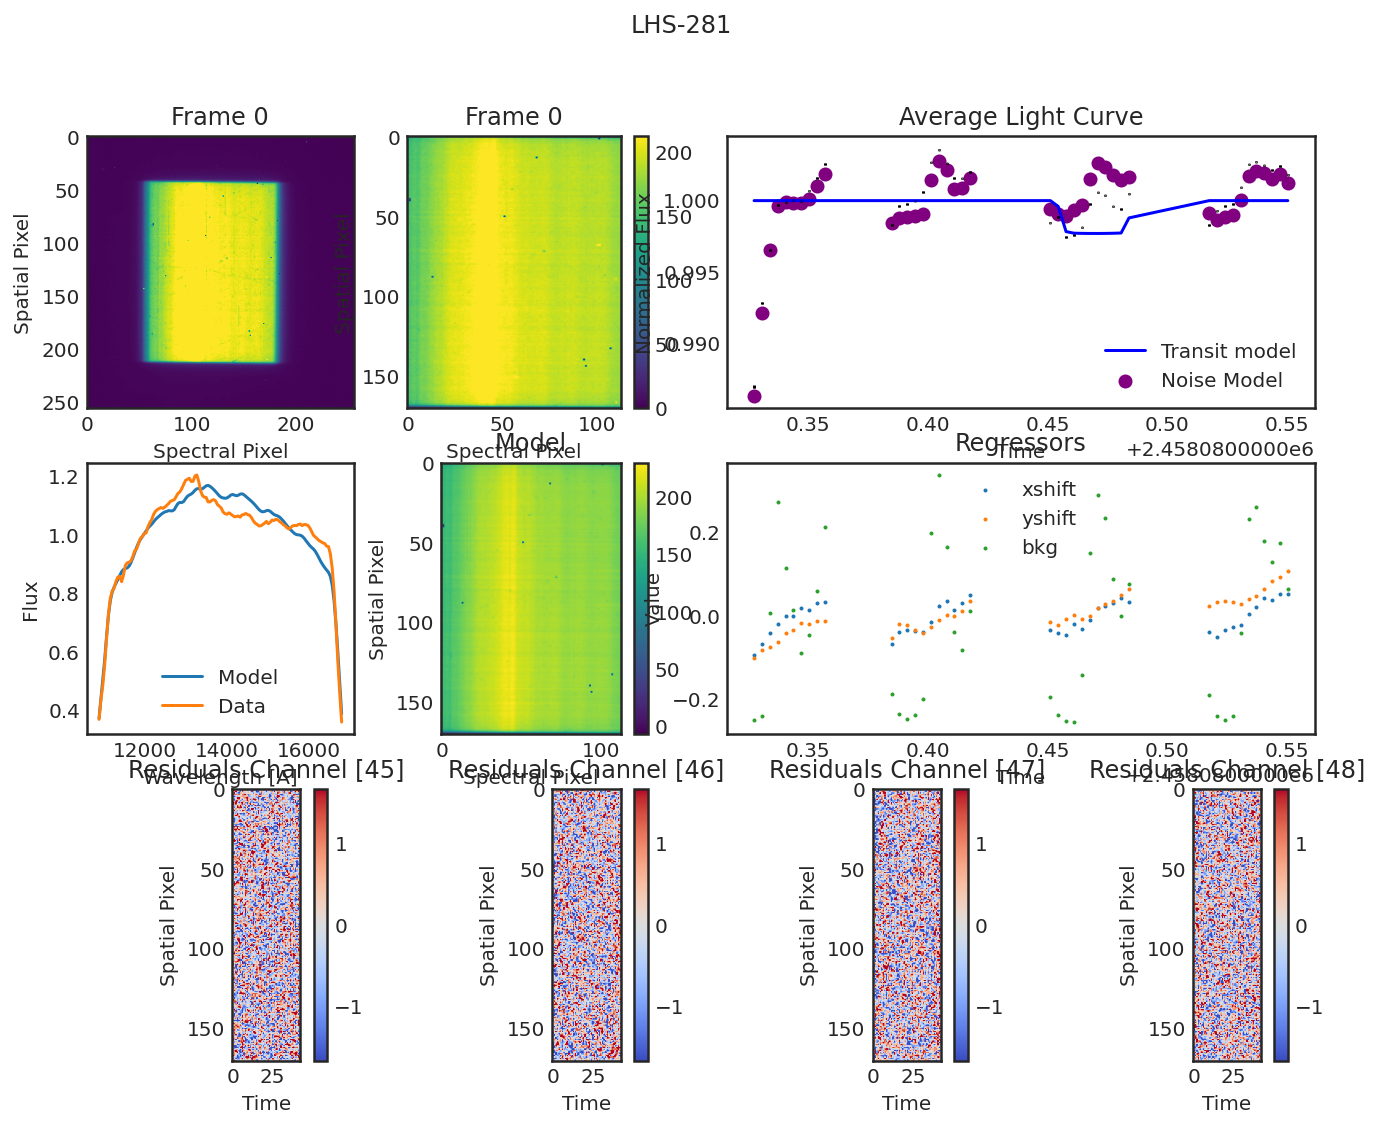

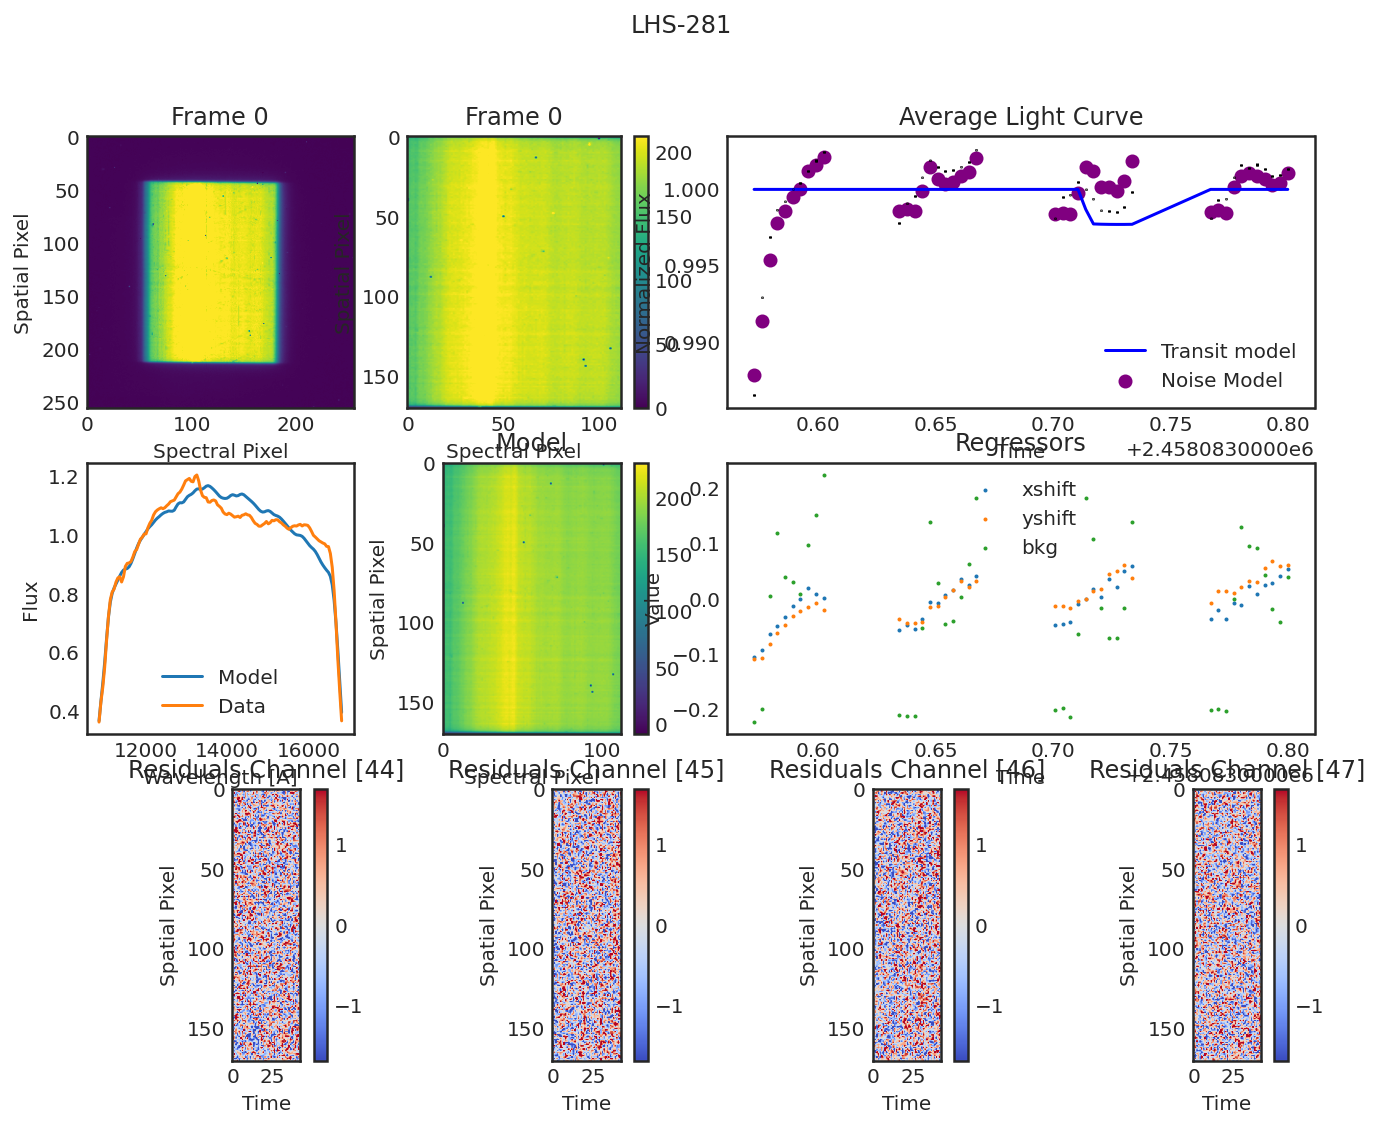

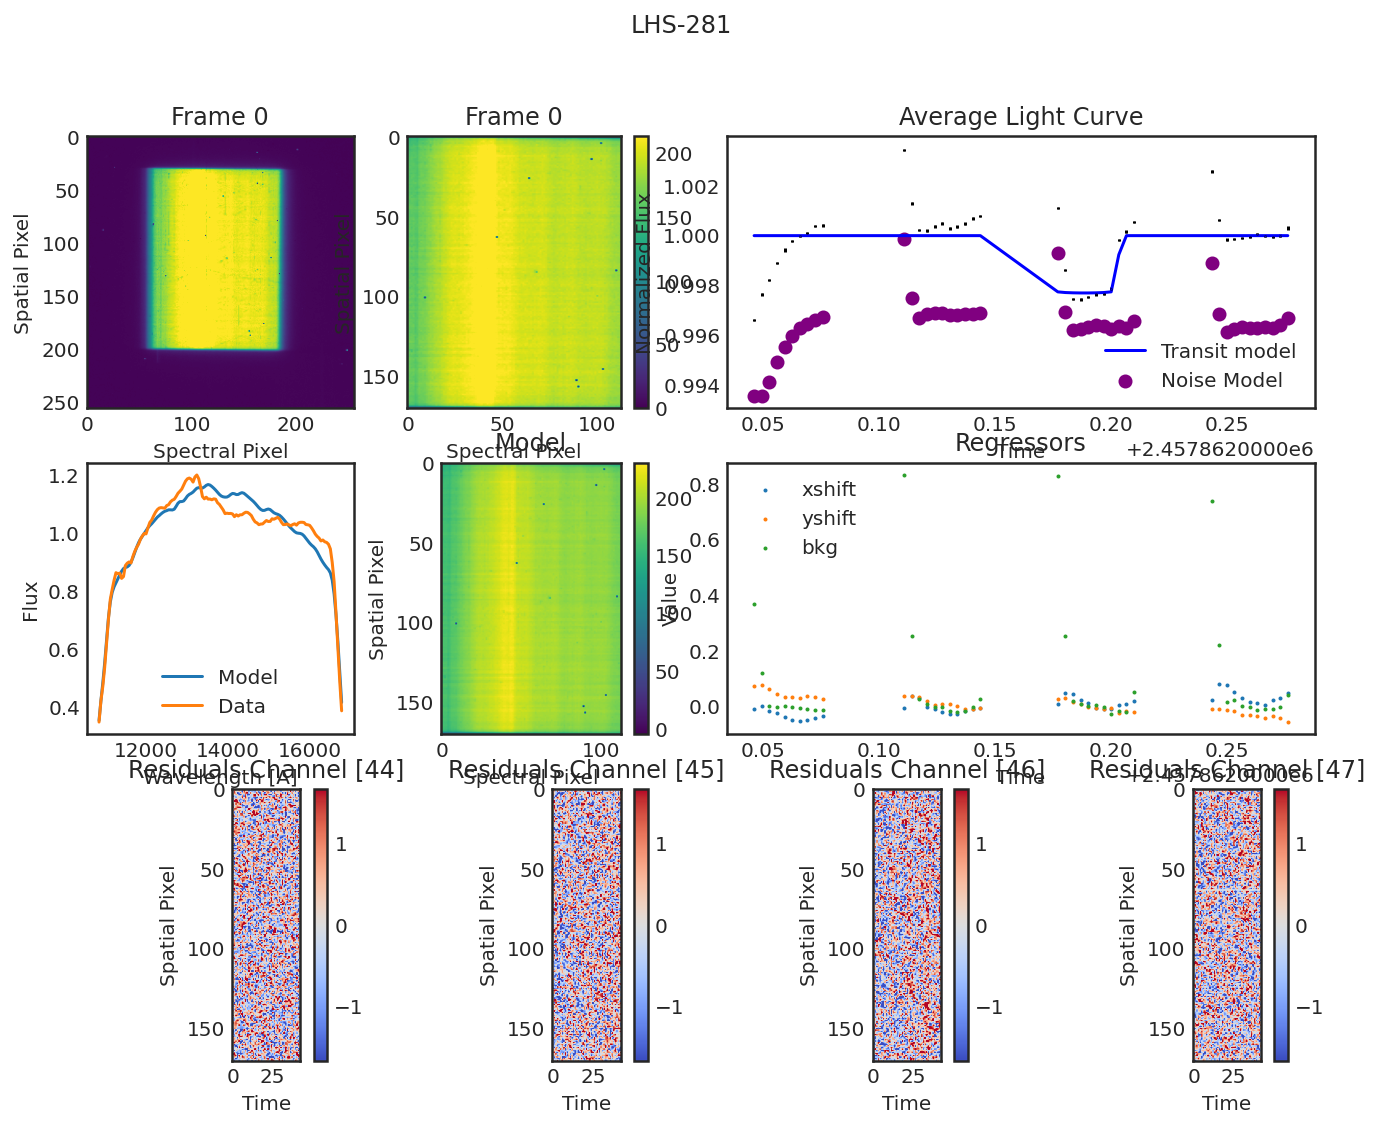

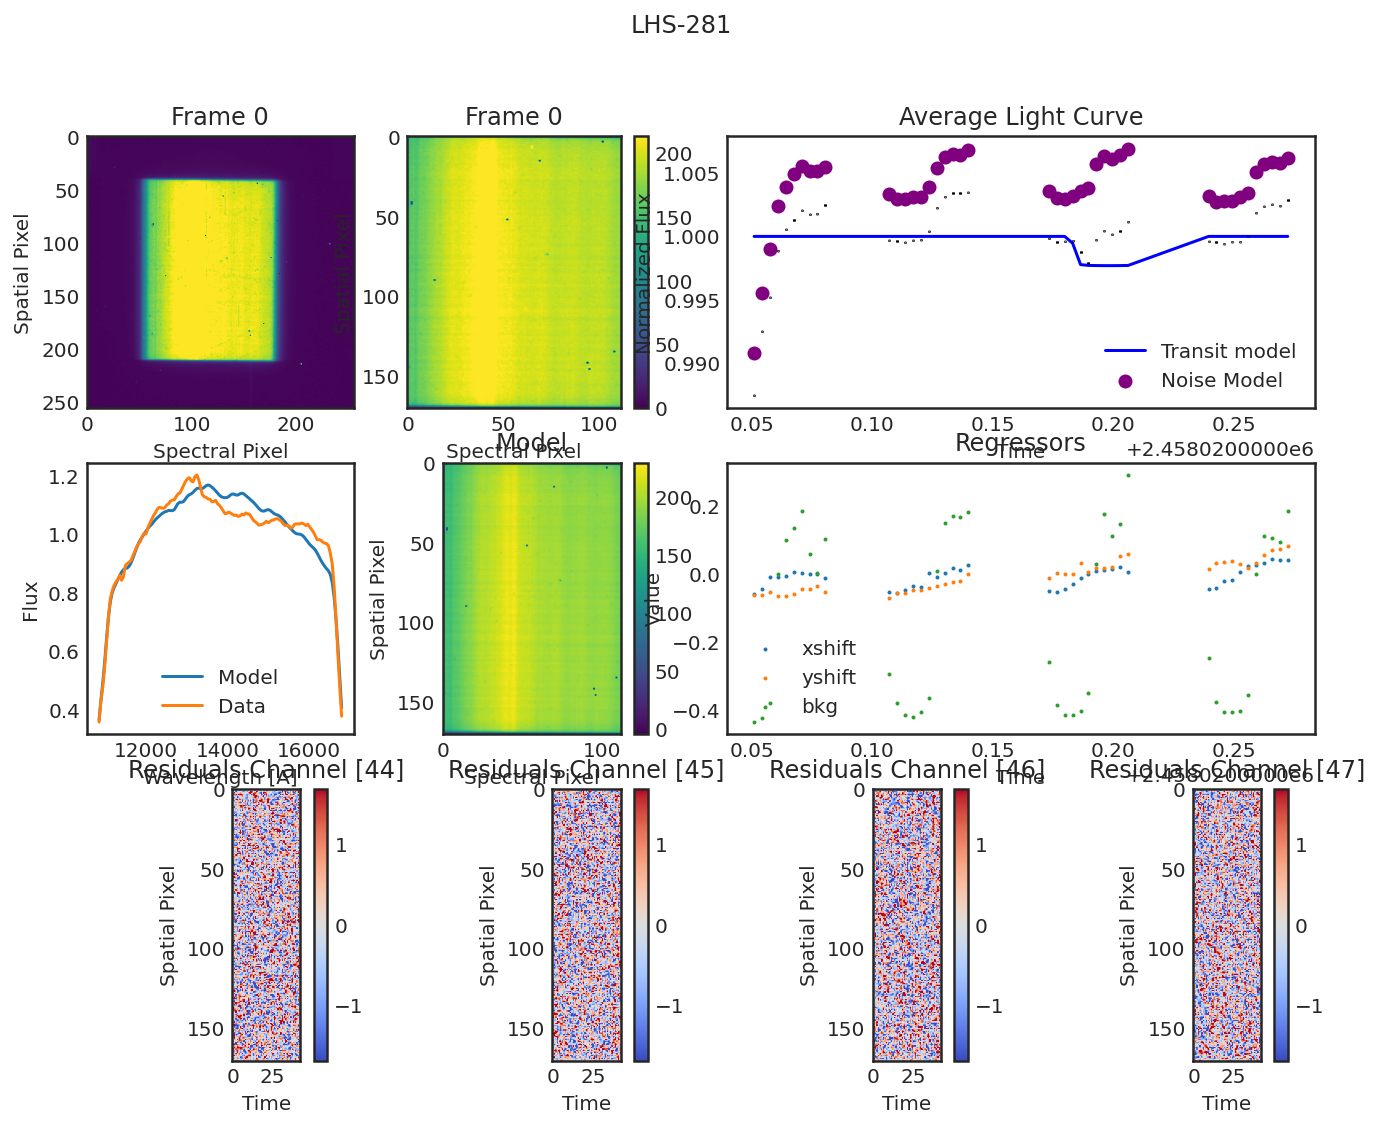

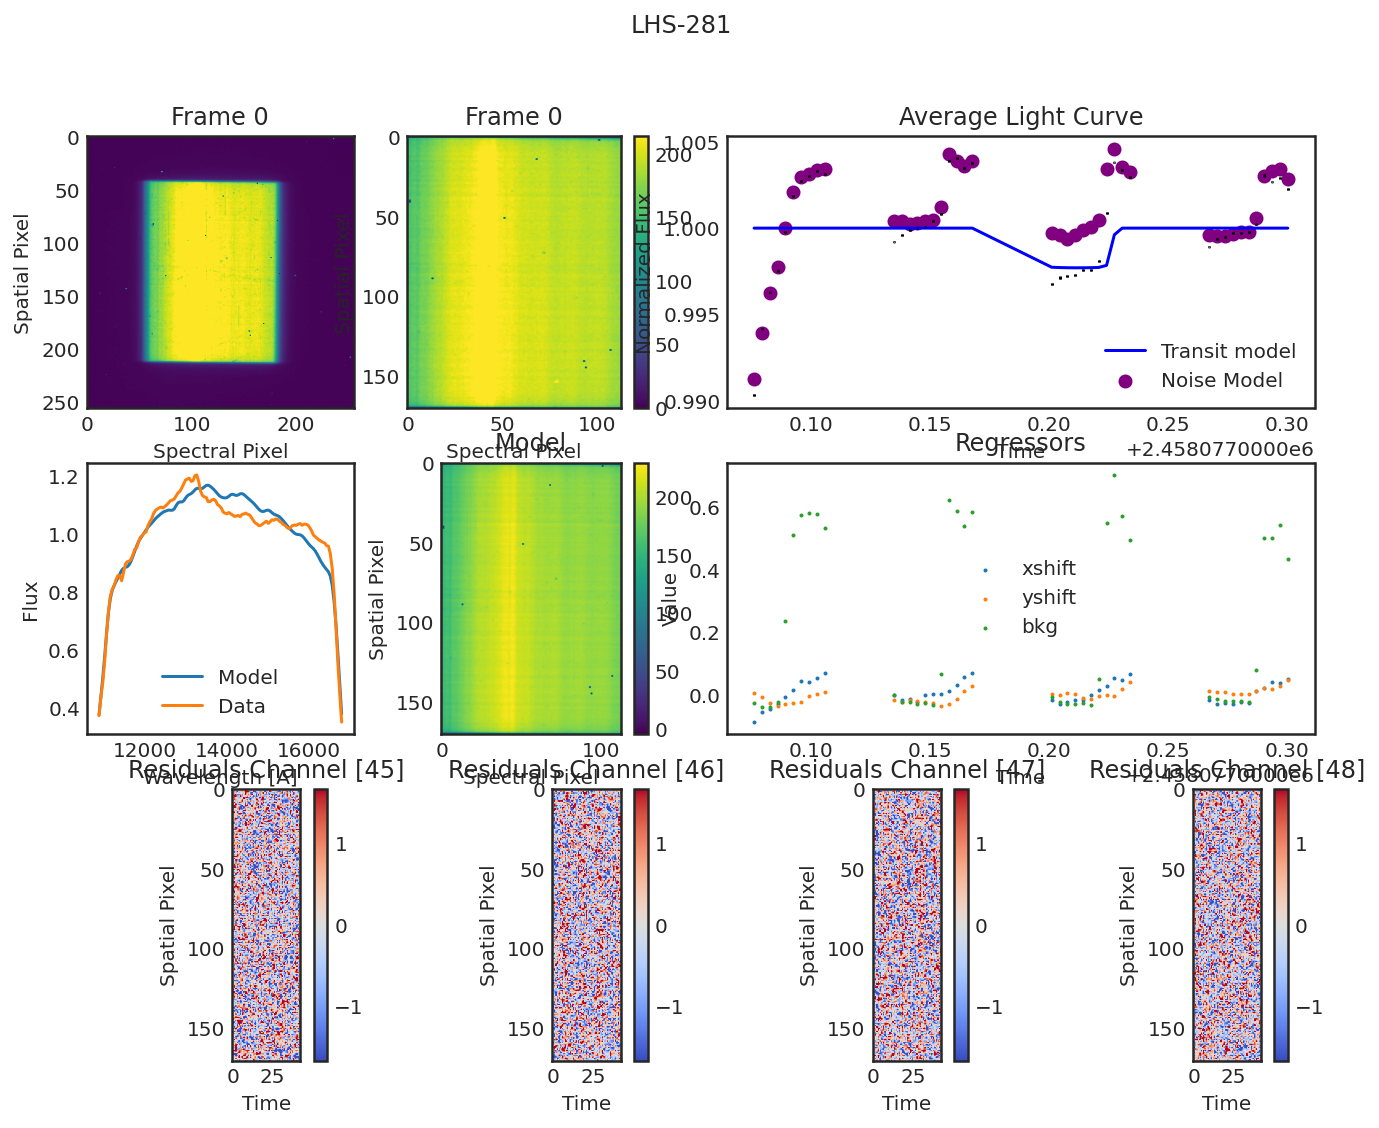

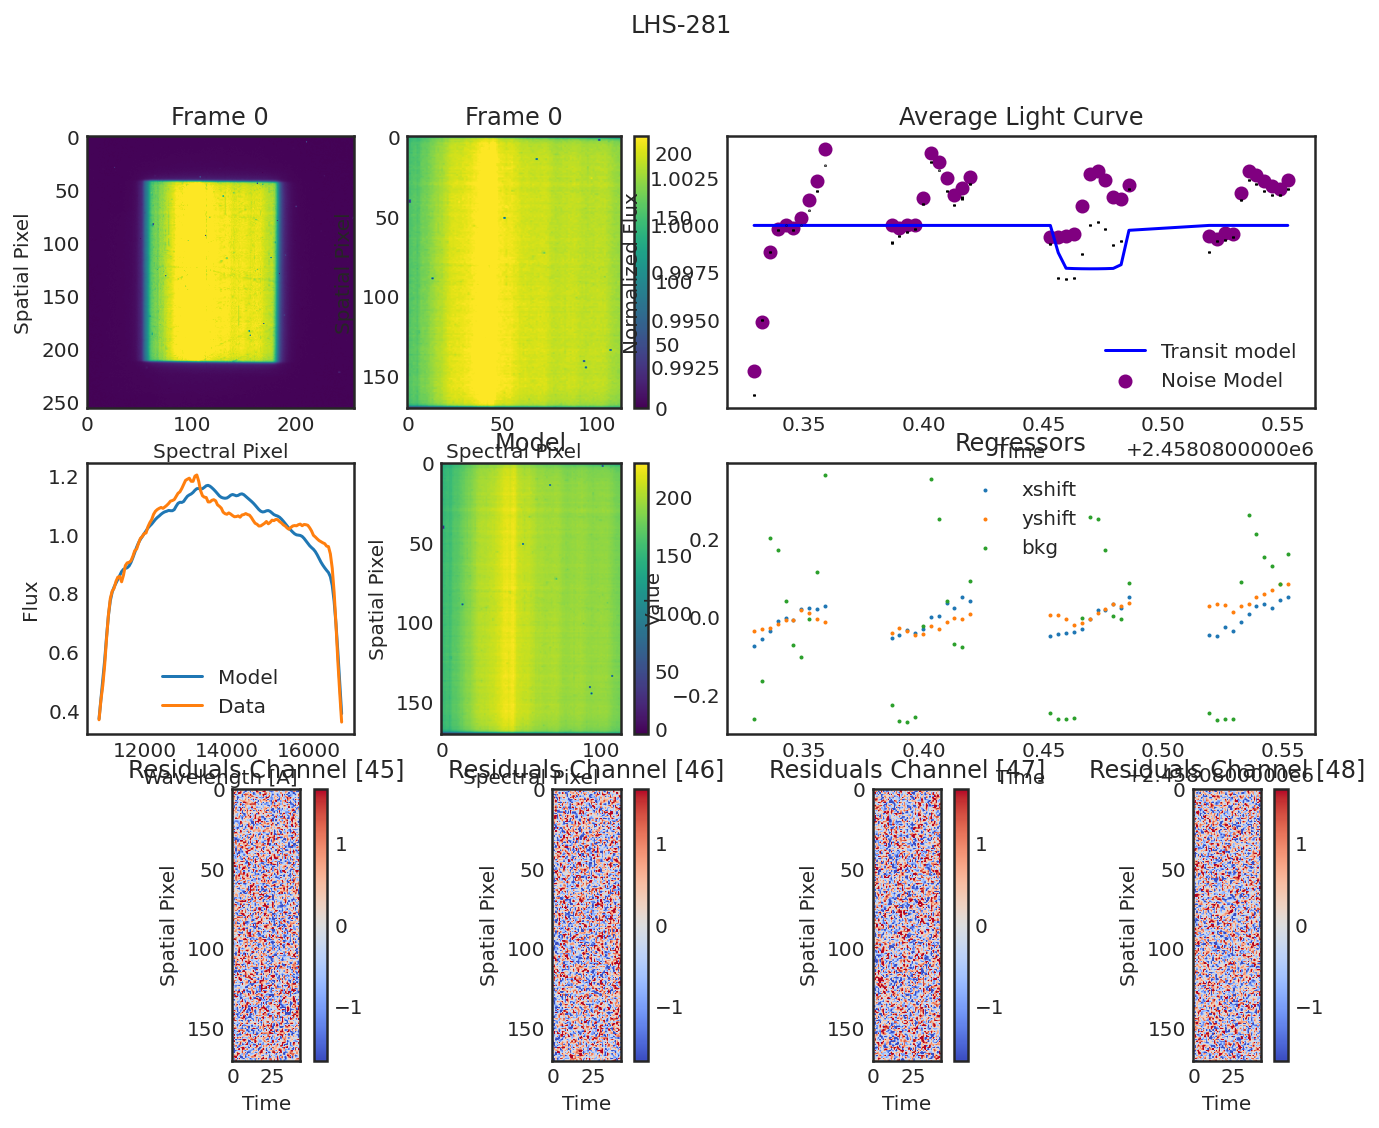

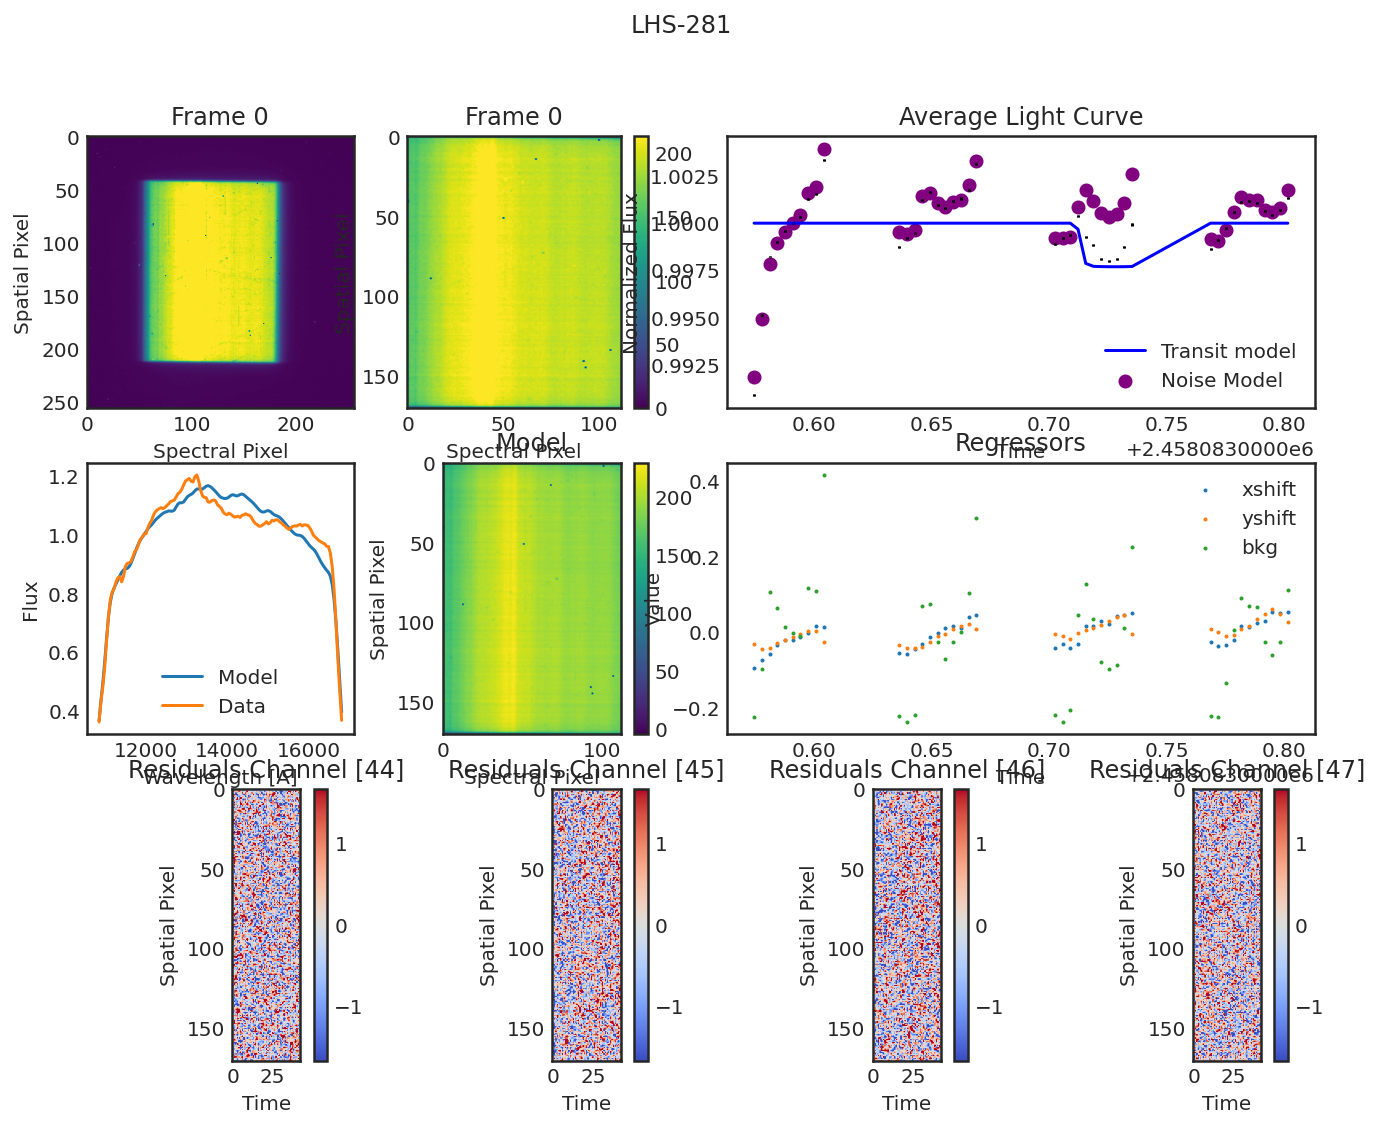

In [11]:
for visit in obs:
    visit.diagnose();
    plt.show();